# lor-budget-deck-builder

In [1]:
from lbdb.parser import parser
from lbdb.models.deck import Deck
from tqdm import tqdm

MATCHES_THRESHOLD = 100
FORMAT = 'Eternal' # 'Standard'

tqdm.pandas()

lor_gg_decks = parser.get_decks(MATCHES_THRESHOLD, FORMAT)
lor_gg_decks = lor_gg_decks[lor_gg_decks.winrate >= 0.5]
lor_gg_decks['deck'] = lor_gg_decks['deck_code'].progress_apply(lambda deck_code : Deck.from_code(deck_code))

100%|██████████| 287/287 [05:51<00:00,  1.23s/it]


In [2]:
lor_gg_decks

,deck_code,matches,wins,winrate,archetype_id,deck
0,CECQCAICBQAQKBAZAEDAEIACAMCAGBIDAECBANBYAUAQCA...,5436,3104,0.5710,6189,"Viktor, Heimerdinger"
1,CMCACBQGFUAQMBYFAQCAMAIDAUHQMBAHCMLECRCKKAAQCB...,2841,1486,0.5231,2270,"Pyke, Rek'Sai"
2,CMCACCIHBEBACAQGFICQIAQEAUEASDQFAQDQGGRTLVZAAA...,2718,1678,0.6174,2587,"Azir, Irelia"
4,CEDQCAIADIAQCAJKAECAABIBBAAAUAQGAESCSAQIAEAR4A...,1604,910,0.5673,35556,"Volibear, Trundle"
5,CQCQCAYCAIAQMCQ2AEEQUCYCAUFJCAOAAEBQCBAMFAWQMA...,1454,825,0.5674,3375,"Lulu, Jinx"
...,...,...,...,...,...,...
349,CMCACAIBCYAQEAIGAEEACGACAQDTOQYHAEBACAQBAYAREA...,101,58,0.5743,13765,"Renekton, Sejuani, Sivir"
350,CMCACBYDA4BQMBYEAUTAGBYHAQESOBAEA5TG3AQBQMAQCA...,100,50,0.5000,2286,"Samira, Akshan"
351,CQBQCBQHGABAIBZHJEBQSARNGM5AOAIDAIKACBICAYAQQC...,100,63,0.6300,8335,"Taliyah, Zilean"
352,CMCQCAICFIAQMBZCAEEQOCICAQBAKCIEAQDQGGRTOICACA...,100,58,0.5800,2587,"Azir, Irelia"


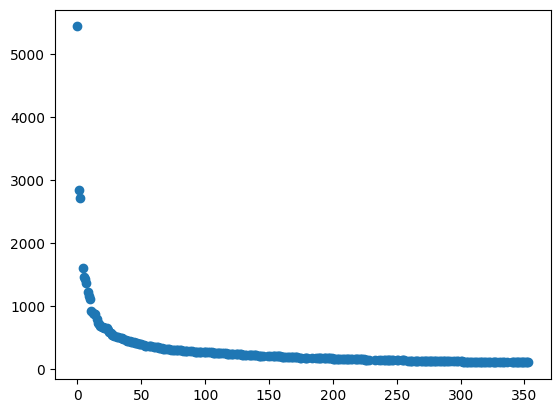

In [3]:
from matplotlib import pyplot as plt

my_plot = plt.scatter(x=lor_gg_decks.index, y=lor_gg_decks.matches)
plt.show()

In [4]:
import json

with open('./data/collection.json') as f:
    COLLECTION_CODES = json.load(f)

collection_deck = Deck.from_code(COLLECTION_CODES[0])
for i in range(1, len(COLLECTION_CODES)):
    collection_deck += Deck.from_code(COLLECTION_CODES[i])

collection_deck

Jarvan IV, Kalista, Thresh, Riven, Gangplank, Lissandra, LeBlanc, Kindred, Jinx, Braum, Garen, Shen, Teemo, Trundle, Soraka, Leona, Akshan, Ashe, Nami, Vi, Lux, Ahri, Miss Fortune, Morgana, Lucian, Swain, Jayce, Ezreal, Anivia, Yuumi, Tryndamere, Pyke, Gnar, Karma, Tahm Kench, Taliyah, Lux: Illuminated, Yasuo, Darius, Fizz, Zed, Rek'Sai, Caitlyn, Lulu, Hecarim, Elise

In [5]:
lor_gg_decks['cost'] = lor_gg_decks['deck'].apply(lambda d : d.cost)
lor_gg_decks['lack_deck'] = lor_gg_decks['deck'].apply(lambda d : d - collection_deck)
lor_gg_decks['lack_cost'] = lor_gg_decks['lack_deck'].apply(lambda d : d.cost)
lor_gg_decks = lor_gg_decks.sort_values('lack_cost')
lor_gg_decks

,deck_code,matches,wins,winrate,archetype_id,deck,cost,lack_deck,lack_cost
344,CECACAQDAMAQIAYQAQAQGDYZFY3QOAIFEQTSQMJSGU4AAA...,102,51,0.5000,3123,Elise,14700,,1400
319,CEBAIAIFEQYTKOAIAEBQEBYJBQHRSKBXAEBACAYNEYAA,112,75,0.6696,3519,"Darius, Elise",21300,,2400
225,CECQCAICFIAQIAQOAEDAKJQCAYBAGCIFAECQUDAVC4VAIA...,145,73,0.5034,6574,Hecarim,15100,,3000
238,CEEACAIDBUAQEAIGAEBQCAQBAUAQMAIHAEIACCADCMBAQA...,139,94,0.6763,4626,,7400,,4900
127,CEDACAQBAYAQEAYFAEEAGEYCAEAQSFQCBAARGGAEAEBQWE...,228,123,0.5395,7407,"Darius, Braum",22400,Darius,5100
...,...,...,...,...,...,...,...,...,...
278,CICACAIBGQAQMAJEAIBQCBQKAIBQSQCXAQAQMAJJAIAQCD...,125,76,0.6080,2821,"Aurelion Sol, Trundle",43300,"Aurelion Sol, Trundle",32600
346,CQCQCAYEAMAQIBARAECQIJQCAUFCRPABAIDAIFAVAUAQGB...,101,65,0.6436,2573,"Seraphine, Viktor",34400,"Seraphine, Viktor",33500
158,CQDACAQCA4AQMAREAEEAUBQBBEDBMBAHAIEQWEYUAUDQMA...,196,138,0.7041,2435,"Jack, Sett",37600,"Jack, Sett",34400
260,CUDQCBQKDQAQMAAKAEDAEIQBAYBSEAIGAQEACBQFAYBAMD...,130,68,0.5231,2272,"Kayn, Aatrox",35700,"Kayn, Aatrox",34700


In [6]:
from lbdb.models.rarity import Rarity

RESOURCES = {
    Rarity.CHAMPION: 1,
    Rarity.EPIC: 1,
    Rarity.RARE: 26,
    Rarity.COMMON: 56,
}

ESSENCE = 3673

def deck_to_resources(deck : Deck):
    resources = {}
    for card, count in deck.cards.items():
        resource = card.rarity
        if not resource in resources:
            resources[resource] = 0
        resources[resource] += count
    return resources

def is_obtainable(deck : Deck):
    resources = {}
    for card, count in deck.cards.items():
        if not card.rarity in resources:
            resources[card.rarity] = 0
        resources[card.rarity] += count
    resources_to_buy = {}
    for resource, count in resources.items():
        if count > RESOURCES[resource]:
            resources_to_buy[resource] = count - RESOURCES[resource]
    essence = sum([resource*count for resource, count in resources_to_buy.items()])
    return essence <= ESSENCE

lor_gg_decks['is_obtainable'] = lor_gg_decks['lack_deck'].apply(is_obtainable)
# lor_gg_decks = lor_gg_decks[lor_gg_decks.is_obtainable]
lor_gg_decks

,deck_code,matches,wins,winrate,archetype_id,deck,cost,lack_deck,lack_cost,is_obtainable
344,CECACAQDAMAQIAYQAQAQGDYZFY3QOAIFEQTSQMJSGU4AAA...,102,51,0.5000,3123,Elise,14700,,1400,True
319,CEBAIAIFEQYTKOAIAEBQEBYJBQHRSKBXAEBACAYNEYAA,112,75,0.6696,3519,"Darius, Elise",21300,,2400,True
225,CECQCAICFIAQIAQOAEDAKJQCAYBAGCIFAECQUDAVC4VAIA...,145,73,0.5034,6574,Hecarim,15100,,3000,True
238,CEEACAIDBUAQEAIGAEBQCAQBAUAQMAIHAEIACCADCMBAQA...,139,94,0.6763,4626,,7400,,4900,True
127,CEDACAQBAYAQEAYFAEEAGEYCAEAQSFQCBAARGGAEAEBQWE...,228,123,0.5395,7407,"Darius, Braum",22400,Darius,5100,True
...,...,...,...,...,...,...,...,...,...,...
278,CICACAIBGQAQMAJEAIBQCBQKAIBQSQCXAQAQMAJJAIAQCD...,125,76,0.6080,2821,"Aurelion Sol, Trundle",43300,"Aurelion Sol, Trundle",32600,False
346,CQCQCAYEAMAQIBARAECQIJQCAUFCRPABAIDAIFAVAUAQGB...,101,65,0.6436,2573,"Seraphine, Viktor",34400,"Seraphine, Viktor",33500,False
158,CQDACAQCA4AQMAREAEEAUBQBBEDBMBAHAIEQWEYUAUDQMA...,196,138,0.7041,2435,"Jack, Sett",37600,"Jack, Sett",34400,False
260,CUDQCBQKDQAQMAAKAEDAEIQBAYBSEAIGAQEACBQFAYBAMD...,130,68,0.5231,2272,"Kayn, Aatrox",35700,"Kayn, Aatrox",34700,False


## Hypothesis

If we try to spent our money efficiently, we can buy some cards to make every deck more available:
- **minimize** : overall `lack_cost`
- **minimize** : resources spent
- **constraint** : every card can be bought not less than `0` and no more than `max` in `lack_collection`
- **constraint** : we have limited `resources` 

### Genetic algorithm

In [7]:
lack_cards = {}
for deck in lor_gg_decks.lack_deck:
    for card, count in deck.cards.items():
        if not card.code in lack_cards:
            lack_cards[card.code] = count
        else:
            lack_cards[card.code] = max(count, lack_cards[card.code])
lack_cards

{'01SI049': 1,
 '01NX025': 3,
 '01SI039': 3,
 '01SI040': 1,
 '04NX016': 2,
 '01NX002': 2,
 '01NX012': 1,
 '01NX007': 2,
 '01NX009': 2,
 '01NX040': 1,
 '09SI013': 2,
 '06SI045': 3,
 '06SI041': 1,
 '06IO003': 3,
 '01SI010': 2,
 '06SI038': 3,
 '06IO009': 3,
 '08NX019': 3,
 '01FR005': 2,
 '01FR031': 2,
 '01FR037': 3,
 '06FR024': 3,
 '05FR006': 3,
 '07FR016': 3,
 '08FR024': 3,
 '01NX013': 1,
 '02FR006': 2,
 '08FR019': 3,
 '01NX011': 1,
 '02NX005': 1,
 '03NX018': 1,
 '01NX038': 1,
 '05PZ014': 1,
 '05BC070': 1,
 '07BC009': 1,
 '08BC005': 3,
 '05PZ006': 1,
 '05PZ010': 1,
 '08PZ024': 2,
 '06PZ020': 3,
 '04SI011': 3,
 '03SI003': 3,
 '01PZ017': 1,
 '03SI006': 3,
 '01PZ039': 1,
 '08PZ005': 3,
 '07PZ009': 3,
 '05BW001': 3,
 '02BW038': 2,
 '06NX041': 3,
 '06BW030': 3,
 '02BW040': 3,
 '05BC078': 3,
 '05BC084': 3,
 '05PZ025': 2,
 '06BC026': 3,
 '01PZ012': 1,
 '09BC011': 3,
 '01PZ045': 2,
 '01PZ001': 2,
 '05BC091': 3,
 '03IO002': 2,
 '05BC145': 3,
 '05BC136': 3,
 '05BC073': 1,
 '05BC049': 3,
 '01PZ031'

In [8]:
import pygad as pg

def _cards_dict_to_gene_space(cards_dict : dict[str, int]):
    gene_space = []
    for _, count in cards_dict.items():
        space = []
        for i in range(0, count+1):
            space.append(i)
        gene_space.append(space)
    return gene_space

def _solution_to_cards_dict(solution, cards_dict : dict[str, int]):
    cards = list(cards_dict.keys())
    return {cards[i] : count for i, count in enumerate(solution) if count != 0}

def fitness_func(ga_instance, solution, solution_idx):
    cards_dict = _solution_to_cards_dict(solution, lack_cards)
    deck = Deck(cards_dict)
    decks = lor_gg_decks.copy()
    decks['lack_deck'] = decks['lack_deck'] - deck
    decks['lack_cost'] = decks['lack_deck'].apply(lambda d : d.cost)
    return -(decks['lack_cost'].sum()) #, -deck.cost

gene_space = _cards_dict_to_gene_space(lack_cards)
num_generations = 500

with tqdm(total=num_generations) as pbar:
    ga_instance = pg.GA(
        sol_per_pop = 10,
        num_generations = num_generations,
        num_parents_mating = 4,
        num_genes = len(gene_space),
        gene_space = gene_space,
        fitness_func = fitness_func,
        on_generation = lambda _: pbar.update(1)
    )
    ga_instance.run()

  0%|          | 0/500 [00:00<?, ?it/s]/home/vasilstar/lor-budget-deck-builder/.venv/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
100%|██████████| 500/500 [00:45<00:00, 10.99it/s]


/home/vasilstar/lor-budget-deck-builder/.venv/lib/python3.10/site-packages/pygad/visualize/plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


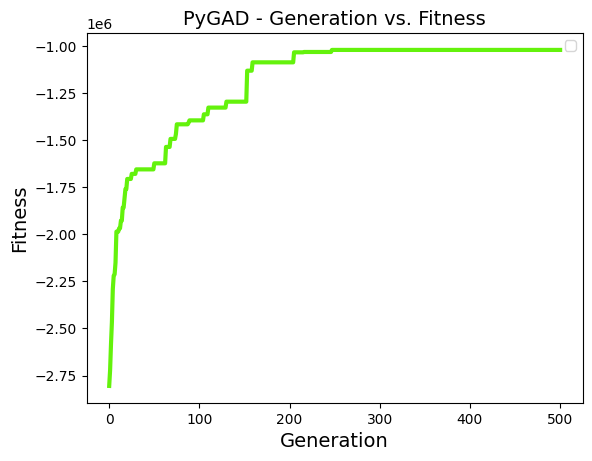

In [9]:
ax = ga_instance.plot_fitness()

In [10]:
best_solution, best_solution_fitness, _ = ga_instance.best_solution()
best_solution_fitness

np.float64(-1019300.0)

In [11]:
Deck(_solution_to_cards_dict(best_solution, lack_cards))

Volibear, Jarvan IV, Elder Dragon, Norra, Renekton, Shyvana, Kalista, Galio, Nautilus, Kennen, Riven, Kai'Sa, Sion, Taric, Maokai, Aphelios, Garen, Shen, Xerath, Trundle, Master Yi, Fiora, Annie, Katarina, Quinn, Jack, Zilean, Leona, Akshan, Ryze, Lux, Aurelion Sol, Veigar, Ahri, Diana, Nasus, Ziggs, Rumble, Udyr, Morgana, Lulu, Lucian, Twisted Fate, Mordekaiser, Irelia, Ekko, Nilah, Senna, The Poro King, Seraphine, Sejuani, Yuumi, Heimerdinger, Azir, Viktor, Sett, Tristana, Pyke, Poppy, Lillia, Janna, Kayn, Aatrox, Nocturne, Lee Sin, Bard, Lux: Illuminated, Draven, Varus, Fizz, Rek'Sai, Ezreal, Jhin, Vex

### Annealing

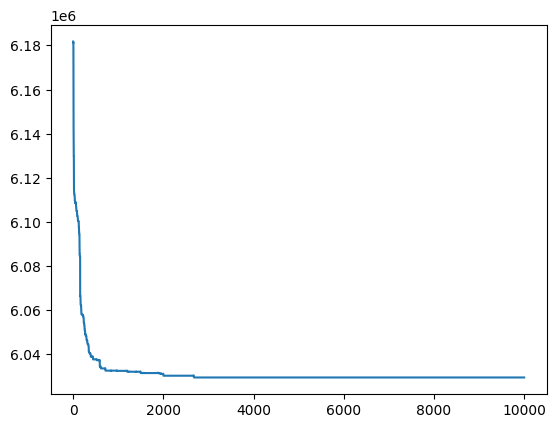

In [12]:
import random
import math
import pandas as pd

class Annealing():

    def __init__(self, decks : pd.DataFrame, lack_cards : dict[str, int], resources : dict[Rarity, int], essence : int):
        self.decks = decks.copy()
        self.lack_cards = lack_cards
        self.resources = resources
        self.essence = essence

    def _objective(self, solution : dict[str, int]) -> int:
        deck = Deck(solution)
        decks = self.decks.copy()
        decks['lack_deck'] = decks['lack_deck'] - deck
        decks['lack_cost'] = decks['lack_deck'].apply(lambda d : d.cost)
        return decks['lack_cost'].sum()

    def _allowed(self, solution : dict[str, int]) -> bool:
        # no more than needed
        for card, count in solution.items():
            if count > self.lack_cards[card]:
                return False
        # enough by resources
        deck = Deck(solution)
        resources = {}
        for card, count in deck.cards.items():
            if not card.rarity in resources:
                resources[card.rarity] = 0
            resources[card.rarity] += count
        resources_to_buy = {}
        for resource, count in resources.items():
            if count > self.resources[resource]:
                resources_to_buy[resource] = count - self.resources[resource]
        essence = sum([resource*count for resource, count in resources_to_buy.items()])
        return essence <= self.essence

    def _perturb(self, solution : dict[str, int]) -> dict[str, int]:
        new_solution = solution.copy()
        key = random.choice(list(new_solution.keys()))
        new_solution[key] = solution[key] + random.choice([-1, 1])
        return new_solution

    def _generate_initial_solution(self):
        return {card : 0 for card in self.lack_cards.keys()}

    def run(
        self,
        rate: float = 0.99,
        t_max: float = 100,
        t_min: float = 1e-3,
        max_iter=10_000,
    ) -> tuple:
            
        best_solution = self._generate_initial_solution()
        best_fitness = self._objective(best_solution)
        T = t_max

        fitnesses = []

        current_solution = best_solution
        current_fitness = best_fitness

        # pbar = tqdm(range(max_iter))

        for _ in range(max_iter):

            # pbar.update(1)
            # pbar.set_description(f"Value : {round(current_fitness, 3)}")

            fitnesses.append(current_fitness)

            # Генерируем новое решение
            solution = self._perturb(current_solution)

            # Проверка ограничений
            if not self._allowed(solution):
                continue

            # Вычисляем значение целевой функции
            fitness = self._objective(solution)

            # Если новое решение лучше, принимаем его
            if fitness < current_fitness:
                current_fitness = fitness
                current_solution = solution
                # Если оно еще лучше лучшего, то меняем и его
                if fitness < best_fitness:
                    best_fitness = fitness
                    best_solution = solution
            else:
                # Принимаем худшее решение с вероятностью, зависящей от температуры
                delta = current_fitness - fitness
                if random.random() < math.exp(delta / T):
                    current_fitness = fitness
                    current_solution = solution

            # Охлаждаем температуру
            T = T * rate
            if T < t_min:
                break

        return best_solution, best_fitness, fitnesses
    
annealing = Annealing(lor_gg_decks, lack_cards, RESOURCES, ESSENCE)
best_sol, best_fit, fitnesses = annealing.run(rate=0.999, max_iter=10_000)
ax = plt.plot(fitnesses)

In [13]:
annealing_deck = Deck({card : count for card, count in best_sol.items() if count > 0})
annealing_deck.cards

{Glimpse Beyond: 1,
 Shrieking Spinner: 1,
 Soul Cleave: 1,
 Yadulski Snowdog: 1,
 Whirling Death: 1,
 Charlatan Fishmonger: 1,
 Unto Dusk: 1,
 Get Excited!: 1,
 Eye Of The Storm: 1,
 Eye of Nagakabouros: 2,
 Shellshocker : 2,
 Gloomsprites: 2,
 Rummage: 1,
 Arena Promoter: 1,
 Yordle Squire: 1,
 Scrapheap: 1,
 Lightning Rush: 1,
 Form Up!: 1,
 Dawning Shadow: 1,
 Gotcha!: 1,
 Portal Pioneer: 1,
 Careful Preparation: 1,
 Carved Bladetwirler: 1,
 Hexplosive Minefield: 1,
 Glare: 2,
 Udyr: 1,
 Vulpine Wanderer: 1,
 Vanguard Defender: 1,
 Vanguard Squire: 1,
 Silverwing Vanguard: 1,
 Trusty Ramhound: 2,
 Legion of the Severed: 1,
 Epic Scraptraption: 1,
 Mister Root: 1,
 Petal Pixie: 1,
 Xolaani the Bloodweaver: 1,
 Rock Hopper: 1,
 Pokey Stick: 1,
 Rite of the Arcane: 1,
 Safety Inspector: 1,
 Black Shield: 2,
 Celestial Impact: 1,
 Barbed Chain: 1,
 Buhru Cultist: 1,
 Junk Construct: 1,
 Magical Fettering: 1,
 Cunning Kitten: 2,
 Vanguard Bannerman: 1,
 Nopeify!: 1,
 Empire Reconstructo

In [19]:
[card for card in annealing_deck.cards.keys() if card.rarity == Rarity.CHAMPION]

[Udyr]

In [14]:
len(annealing_deck)

111

In [15]:
annealing_decks = lor_gg_decks.copy()
annealing_decks['lack_deck'] = annealing_decks['deck'].apply(lambda d : d - (collection_deck + annealing_deck))
annealing_decks['lack_cost'] = annealing_decks['lack_deck'].apply(lambda d : d.cost)
annealing_decks = annealing_decks.sort_values('lack_cost')
annealing_decks

,deck_code,matches,wins,winrate,archetype_id,deck,cost,lack_deck,lack_cost,is_obtainable
344,CECACAQDAMAQIAYQAQAQGDYZFY3QOAIFEQTSQMJSGU4AAA...,102,51,0.5000,3123,Elise,14700,,1000,True
319,CEBAIAIFEQYTKOAIAEBQEBYJBQHRSKBXAEBACAYNEYAA,112,75,0.6696,3519,"Darius, Elise",21300,,2300,True
225,CECQCAICFIAQIAQOAEDAKJQCAYBAGCIFAECQUDAVC4VAIA...,145,73,0.5034,6574,Hecarim,15100,,2700,True
238,CEEACAIDBUAQEAIGAEBQCAQBAUAQMAIHAEIACCADCMBAQA...,139,94,0.6763,4626,,7400,,4800,True
127,CEDACAQBAYAQEAYFAEEAGEYCAEAQSFQCBAARGGAEAEBQWE...,228,123,0.5395,7407,"Darius, Braum",22400,Darius,4900,True
...,...,...,...,...,...,...,...,...,...,...
278,CICACAIBGQAQMAJEAIBQCBQKAIBQSQCXAQAQMAJJAIAQCD...,125,76,0.6080,2821,"Aurelion Sol, Trundle",43300,"Aurelion Sol, Trundle",32500,False
346,CQCQCAYEAMAQIBARAECQIJQCAUFCRPABAIDAIFAVAUAQGB...,101,65,0.6436,2573,"Seraphine, Viktor",34400,"Seraphine, Viktor",33100,False
197,CUCQCBIHBYAQSBYJAIAQCHZCAMDAOBAFEICQIBY2FM3EW4...,165,85,0.5152,55948,"Azir, Elder Dragon, Xerath",38100,"Azir, Elder Dragon, Xerath",33600,False
158,CQDACAQCA4AQMAREAEEAUBQBBEDBMBAHAIEQWEYUAUDQMA...,196,138,0.7041,2435,"Jack, Sett",37600,"Jack, Sett",34100,False


In [20]:
lor_gg_decks[lor_gg_decks.is_obtainable]

,deck_code,matches,wins,winrate,archetype_id,deck,cost,lack_deck,lack_cost,is_obtainable
344,CECACAQDAMAQIAYQAQAQGDYZFY3QOAIFEQTSQMJSGU4AAA...,102,51,0.5000,3123,Elise,14700,,1400,True
319,CEBAIAIFEQYTKOAIAEBQEBYJBQHRSKBXAEBACAYNEYAA,112,75,0.6696,3519,"Darius, Elise",21300,,2400,True
225,CECQCAICFIAQIAQOAEDAKJQCAYBAGCIFAECQUDAVC4VAIA...,145,73,0.5034,6574,Hecarim,15100,,3000,True
238,CEEACAIDBUAQEAIGAEBQCAQBAUAQMAIHAEIACCADCMBAQA...,139,94,0.6763,4626,,7400,,4900,True
127,CEDACAQBAYAQEAYFAEEAGEYCAEAQSFQCBAARGGAEAEBQWE...,228,123,0.5395,7407,"Darius, Braum",22400,Darius,5100,True
217,CQCQCCAKAUAQQBAYAIDQUCIUAMCQIAQGBICACBAIDE2DUA...,151,88,0.5828,2331,"Caitlyn, Teemo",28600,Caitlyn,6900,True
326,CQDACAYCAIAQKCSUAECQIGIBAYFBUAIJBIFQGAIEBQUC2B...,107,55,0.5140,3375,"Lulu, Jinx",23300,Lulu,8500,True
214,CQDACAYEAUAQOCQJAEEQUCYCA4CAKCIDAECBCNBWAUCQUM...,152,98,0.6447,2930,,10500,,8600,True
219,CQDACAYCAIAQKBAZAEDAUGQBBEFAWAQFBJKJCAIDAECAYK...,150,80,0.5333,3375,"Lulu, Jinx",22200,Lulu,8600,True
226,CQCQCAYCAIAQMCQ2AEEQUCYDAECAYKBNAMCQUVMRAHAACB...,145,87,0.6000,3375,"Lulu, Jinx",24100,Lulu,9600,True


In [17]:
annealing_decks.lack_cost.sum()

np.int64(6026800)

In [18]:
lor_gg_decks.lack_cost.sum()

np.int64(6181800)